In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Augmented_Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Augmented_Dataset/Early/Early_0095.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0074.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0024.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0022.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0060.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0066.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0069.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0092.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0058.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0096.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0087.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0102.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0021.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0050.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0065.jpg
/content/drive/MyDrive/Augmented_Dataset/Early/Early_0036.jpg
/content

Import the Required Libraries

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Data preparation

**Preprocessing**

In [17]:
X = []
Y = []
image_size = 224
labels = ['Benign', 'Early', 'Pre', 'Pro']
# Load all images and their labels
for label in labels:
    folder_path = os.path.join('/content/drive/MyDrive/Augmented_Dataset', label)
    for filename in os.listdir(folder_path): # lister tout les fichier qui sont dans le dossier
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(label)

**Train Test Val Split**

In [52]:
from sklearn.model_selection import train_test_split

# Séparer X_train en sous-ensemble d'entraînement et validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, stratify=Y_train, random_state=42)

print("Training data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)

Training data shape: (3124, 224, 224, 3)
Validation data shape: (348, 224, 224, 3)


In [6]:
pd.DataFrame(Y_train).value_counts()

,count
0,
Early,886
Pre,867
Pro,864
Benign,855


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

Y_train=label_encoder.fit_transform(Y_train)
Y_test=label_encoder.transform(Y_test)


In [8]:
print(labels)
print(label_encoder.transform(labels))

['Benign', 'Early', 'Pre', 'Pro']
[0 1 2 3]


## Defining the Model
**Convolutional Layer (Bloc 1):**
- Nous ajoutons une couche `Conv2D` avec 32 filtres, chacun ayant une taille de noyau de 5x5.
- La fonction d'activation ReLU est appliquée pour introduire la non-linéarité.
- La forme d'entrée est spécifiée dans la couche d'entrée.
- **Max Pooling Layer** : Une couche `MaxPooling2D` est ajoutée pour réduire la dimension spatiale de la sortie en prenant la valeur maximale dans chaque région 2x2.

**Convolutional Layer (Bloc 2) :**
- Une autre couche `Conv2D` est ajoutée avec 64 filtres, chacun ayant une taille de noyau de 5x5.
- La fonction d'activation ReLU est appliquée.
- **Max Pooling Layer** : Une couche `MaxPooling2D` est ajoutée pour continuer à réduire les dimensions spatiales.

**Convolutional Layer (Bloc 3) :**
- Une couche `Conv2D` est ajoutée avec 128 filtres, chacun ayant une taille de noyau de 5x5.
- La fonction d'activation ReLU est appliquée.
- **Max Pooling Layer** : Une couche `MaxPooling2D` est ajoutée pour réduire encore la taille des cartes de caractéristiques.

**Convolutional Layer (Bloc 4) :**
- Une couche `Conv2D` est ajoutée avec 256 filtres, chacun ayant une taille de noyau de 5x5.
- La fonction d'activation ReLU est appliquée.
- **Max Pooling Layer** : Une couche `MaxPooling2D` est ajoutée pour compresser davantage les dimensions.

**Flatten Layer :**
- Nous ajoutons une couche `Flatten` pour convertir la sortie multidimensionnelle en un vecteur 1D.
- Cela prépare les données pour les couches entièrement connectées.

**Fully Connected Layers :**
- Nous ajoutons une couche `Dense` avec 32 unités/neurones et une activation ReLU pour introduire la non-linéarité.
- Une deuxième couche `Dense` avec 64 unités/neurones et activation ReLU est ajoutée.
- Une troisième couche `Dense` avec 128 unités/neurones et activation ReLU est ajoutée.

**Output Layer :**
- Nous ajoutons une couche finale `Dense` avec 4 unités/neurones, correspondant au nombre de classes dans la tâche de classification.
- La fonction d'activation softmax est appliquée pour obtenir les probabilités des classes.

In [9]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model=Sequential([
    #Block1
    layers.InputLayer(shape=[224,224,3]),
    layers.Conv2D(filters=32,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block2
    layers.Conv2D(filters=64,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block3
    layers.Conv2D(filters=128,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Block4
    layers.Conv2D(filters=256,kernel_size=5,activation='relu'),
    layers.MaxPool2D(),
    #Head
    layers.Flatten(),
    layers.Dense(units=32,activation='relu'),
    layers.Dense(units=64,activation='relu'),
    layers.Dense(units=128,activation='relu'),
    layers.Dense(units=4,activation='softmax'),
])

# Model Summary

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 220, 220, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 110, 110, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 106, 106, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 53, 53, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 49, 49, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 20, 20, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         819,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,908,260 (7.28 MB)

 Trainable params: 1,908,260 (7.28 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


# Training the Model

In [12]:
history=model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 841s 9s/step - accuracy: 0.2931 - loss: 13.4776 - val_accuracy: 0.3448 - val_loss: 1.6747
Epoch 2/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 848s 8s/step - accuracy: 0.4979 - loss: 1.1073 - val_accuracy: 0.6408 - val_loss: 0.7357
Epoch 3/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 855s 8s/step - accuracy: 0.7069 - loss: 0.6730 - val_accuracy: 0.8305 - val_loss: 0.5150
Epoch 4/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 861s 8s/step - accuracy: 0.7965 - loss: 0.5391 - val_accuracy: 0.8592 - val_loss: 0.3678
Epoch 5/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 820s 8s/step - accuracy: 0.8265 - loss: 0.4085 - val_accuracy: 0.8736 - val_loss: 0.3561
Epoch 6/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 862s 8s/step - accuracy: 0.8727 - loss: 0.3180 - val_accuracy: 0.8678 - val_loss: 0.2973
Epoch 7/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 856s 8s/step - accuracy: 0.8909 - loss: 0.2752 - val_accuracy: 0.8966 - val_loss: 0.2561
Epoch 8/20
98/98 ━━━━━━━━━━━━━━━━━━━━ 880s 8s/step - accuracy: 0.9085 - loss: 0.2214 - val_accuracy: 0.9195 - 

# Evaluating our model

Text(0.5, 1.0, 'Train - Accuracy')

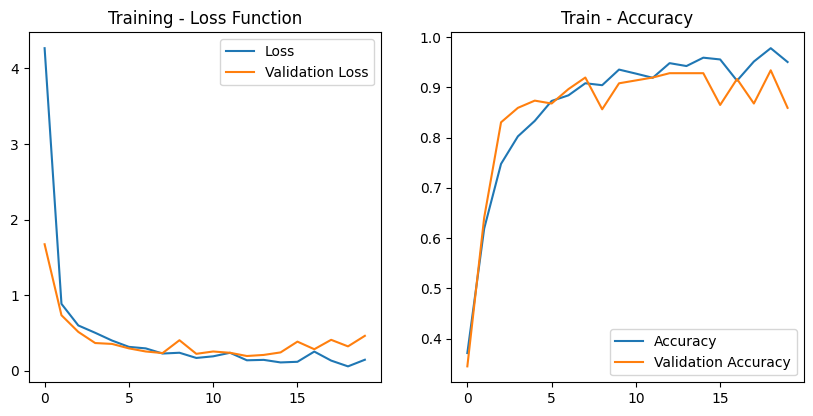

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [38]:
print(Y_test.dtype)  # Vérifiez le type de données


<U6


In [39]:
# Convertir les chaînes de caractères en entiers
encoder = LabelEncoder()
Y_test_encoded = encoder.fit_transform(Y_test)

# Utiliser Y_test_encoded dans l'évaluation du modèle
score = model.evaluate(X_test, Y_test_encoded, verbose=0)
print('Test Accuracy : {:.2f}'.format(score[1] * 100) + '%')

Test Accuracy : 80.57%


In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_true_encoded = encoder.fit_transform(y_true)  # Convertir y_true en entiers
report = classification_report(y_true_encoded, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

      Benign       0.76      0.71      0.73        95
       Early       0.69      0.75      0.71        99
         Pro       0.81      0.89      0.85        96
         Pre       1.00      0.89      0.94        96

    accuracy                           0.81       386
   macro avg       0.81      0.81      0.81       386
weighted avg       0.81      0.81      0.81       386



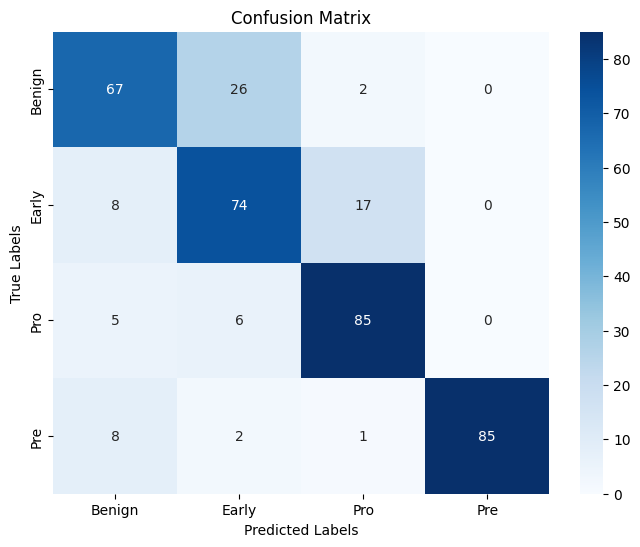

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_true_encoded , y_pred_classes)

# Affichage de la matrice de confusion sous forme de heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [65]:
y_pred_classes = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_classes, axis=1)  # Si tu as des probabilités, convertir en classes


13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step


In [66]:
# Si y_pred_classes est plus long que y_true_encoded
y_pred_classes = y_pred_classes[:len(y_true_encoded)]


**Courbe ROC**

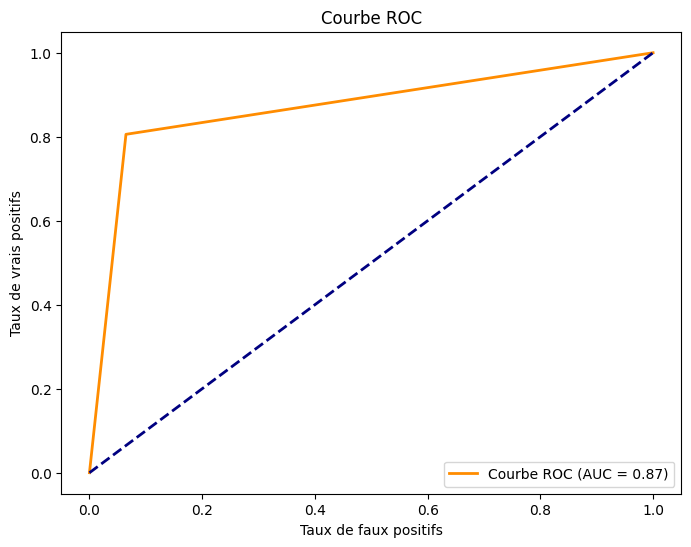

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

if len(y_true_encoded) == len(y_pred_classes):
    y_true_bin = label_binarize(y_true_encoded, classes=[0, 1, 2, 3])
    y_pred_bin = label_binarize(y_pred_classes, classes=[0, 1, 2, 3])

    # Calculer la courbe ROC et AUC pour chaque classe
    fpr, tpr, _ = roc_curve(y_true_bin.ravel(), y_pred_bin.ravel())  # Calcul des taux de faux positifs et vrais positifs
    roc_auc = auc(fpr, tpr)  # Calcul de l'AUC

    # Afficher la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC')
    plt.legend(loc='lower right')
    plt.show()

else:
    print("Les tailles de y_true_encoded et y_pred_classes ne correspondent pas.")
